In [1]:
pip install nltk Sastrawi pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.0 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from wordcloud import WordCloud
from collections import Counter
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
data= pd.read_csv('/content/drive/MyDrive/Skripsi/makansiang_gratis_new.csv')
data

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1848970473864052798,Wed Oct 23 06:11:27 +0000 2024,0,Makan siang gratis tapi yang gratis cuma beef ...,1848970473864052798,https://pbs.twimg.com/media/Gajc2KmbEAEyK-3.jpg,NaN,in,Indonesia,0,0,0,https://x.com/mbakhayu/status/1848970473864052798,1687388177798221825,mbakhayu
1,1848970469388718152,Wed Oct 23 06:11:26 +0000 2024,0,dut makan siang gratis mana dut laper,1848970469388718152,NaN,NaN,in,NaN,0,0,0,https://x.com/rcmmmy/status/1848970469388718152,1156917616700616704,rcmmmy
2,1848655568397078566,Wed Oct 23 06:08:30 +0000 2024,0,@KemensetnegRI yang saya pahami di universitas...,1848969729551307179,NaN,KemensetnegRI,in,NaN,0,0,0,https://x.com/landjarlandjar/status/1848969729...,1244853536,landjarlandjar
3,1848954000550301957,Wed Oct 23 06:07:57 +0000 2024,0,@detikcom dari 3.005 T sebanyak 1000T akan dik...,1848969590581432509,NaN,detikcom,in,NaN,0,0,0,https://x.com/bpsmgt/status/1848969590581432509,1121436493203922945,bpsmgt
4,1848967522508542259,Wed Oct 23 06:03:28 +0000 2024,0,@unmagnetism Makan siang gratis dulu un https:...,1848968462460457124,https://pbs.twimg.com/media/GajbBJdaoAAMHKY.jpg,unmagnetism,in,NaN,0,0,0,https://x.com/Oxygenn88/status/184896846246045...,1785670214459555840,Oxygenn88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,1845366342230344137,Sun Oct 13 07:29:55 +0000 2024,0,Gizi seimbang untuk anak bangsa #IndonesiaEmas...,1845366342230344137,https://pbs.twimg.com/media/GZwO6IKaAAI0Kmk.jpg,NaN,in,"East Borneo, Indonesia",0,0,0,https://x.com/luasikbanget/status/184536634223...,1618041706749857793,luasikbanget
2364,1845366263901798605,Sun Oct 13 07:29:37 +0000 2024,0,Makanan bergizi itu penting #IndonesiaEmas #Pr...,1845366263901798605,https://pbs.twimg.com/media/GZwO1iNaAAEHcv6.jpg,NaN,in,"East Borneo, Indonesia",0,0,0,https://x.com/luasikbanget/status/184536626390...,1618041706749857793,luasikbanget
2365,1845272003038806516,Sun Oct 13 07:26:41 +0000 2024,0,@roseuro Program makan siang bergizi gratis ko...,1845365526241083590,NaN,roseuro,in,NaN,0,0,0,https://x.com/qalsya_mr4/status/18453655262410...,1684444305224794113,qalsya_mr4
2366,1845363345823760870,Sun Oct 13 07:23:40 +0000 2024,0,@Arie_Kriting Pasti ini nyindir program makan ...,1845364768561037602,NaN,Arie_Kriting,in,NaN,0,0,0,https://x.com/AwanM3ndung/status/1845364768561...,1410643795201253378,AwanM3ndung


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2368 entries, 0 to 2367
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      2368 non-null   int64 
 1   created_at               2368 non-null   object
 2   favorite_count           2368 non-null   int64 
 3   full_text                2368 non-null   object
 4   id_str                   2368 non-null   int64 
 5   image_url                805 non-null    object
 6   in_reply_to_screen_name  756 non-null    object
 7   lang                     2368 non-null   object
 8   location                 1220 non-null   object
 9   quote_count              2368 non-null   int64 
 10  reply_count              2368 non-null   int64 
 11  retweet_count            2368 non-null   int64 
 12  tweet_url                2368 non-null   object
 13  user_id_str              2368 non-null   int64 
 14  username                 2368 non-null  

In [6]:
summary = data.describe()
(summary)

,conversation_id_str,favorite_count,id_str,quote_count,reply_count,retweet_count,user_id_str
count,2.368000e+03,2368.000000,2.368000e+03,2368.000000,2368.000000,2368.000000,2.368000e+03
mean,1.847416e+18,35.528294,1.847468e+18,0.412162,0.663007,12.670186,1.149622e+18
std,1.011538e+15,1199.754758,9.669429e+14,14.123239,9.907879,505.706159,6.930689e+17
min,1.833017e+18,0.000000,1.845364e+18,0.000000,0.000000,0.000000,1.407299e+07
25%,1.846792e+18,0.000000,1.846819e+18,0.000000,0.000000,0.000000,7.564912e+17
50%,1.847633e+18,0.000000,1.847697e+18,0.000000,0.000000,0.000000,1.486233e+18
75%,1.848235e+18,0.000000,1.848248e+18,0.000000,0.000000,0.000000,1.696767e+18
max,1.848970e+18,55155.000000,1.848970e+18,665.000000,352.000000,24325.000000,1.842982e+18


**DATA PREPROCESSING**

In [7]:
data = pd.DataFrame(data[['full_text']])
(data)

,full_text
0,Makan siang gratis tapi yang gratis cuma beef ...
1,dut makan siang gratis mana dut laper
2,@KemensetnegRI yang saya pahami di universitas...
3,@detikcom dari 3.005 T sebanyak 1000T akan dik...
4,@unmagnetism Makan siang gratis dulu un https:...
...,...
2363,Gizi seimbang untuk anak bangsa #IndonesiaEmas...
2364,Makanan bergizi itu penting #IndonesiaEmas #Pr...
2365,@roseuro Program makan siang bergizi gratis ko...
2366,@Arie_Kriting Pasti ini nyindir program makan ...


In [8]:
#Data Duplicate
duplicates = data.duplicated(subset='full_text')
(duplicates.sum())


27

In [9]:
duplicate_rows = data[data.duplicated(subset='full_text', keep=False)]
(duplicate_rows)

,full_text
243,makan siang gratis
311,menunggu makan siang gratis
337,Makan siang gratis
476,info makan siang gratis
592,Info makan siang gratis?
633,info makan siang gratis
654,menunggu makan siang gratis
670,info makan siang gratis
742,info makan siang gratis
777,Info makan siang gratis


In [10]:
data.drop_duplicates(subset='full_text', inplace=True)
(data.count())
data

,full_text
0,Makan siang gratis tapi yang gratis cuma beef ...
1,dut makan siang gratis mana dut laper
2,@KemensetnegRI yang saya pahami di universitas...
3,@detikcom dari 3.005 T sebanyak 1000T akan dik...
4,@unmagnetism Makan siang gratis dulu un https:...
...,...
2363,Gizi seimbang untuk anak bangsa #IndonesiaEmas...
2364,Makanan bergizi itu penting #IndonesiaEmas #Pr...
2365,@roseuro Program makan siang bergizi gratis ko...
2366,@Arie_Kriting Pasti ini nyindir program makan ...


**TEXT PREPROCESSING**

In [11]:
data = pd.DataFrame(data[['full_text']])
(data)

,full_text
0,Makan siang gratis tapi yang gratis cuma beef ...
1,dut makan siang gratis mana dut laper
2,@KemensetnegRI yang saya pahami di universitas...
3,@detikcom dari 3.005 T sebanyak 1000T akan dik...
4,@unmagnetism Makan siang gratis dulu un https:...
...,...
2363,Gizi seimbang untuk anak bangsa #IndonesiaEmas...
2364,Makanan bergizi itu penting #IndonesiaEmas #Pr...
2365,@roseuro Program makan siang bergizi gratis ko...
2366,@Arie_Kriting Pasti ini nyindir program makan ...


**Tahap Cleansing**

In [12]:
def remove_URL(word):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', word)

def remove_html(word):
    html = re.compile(r'<.*?>')
    return html.sub(r'', word)

def remove_emoji(word):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # Emoticon wajah
        u"\U0001F300-\U0001F5FF"  # Simbol dan objek
        u"\U0001F680-\U0001F6FF"  # Transportasi dan peta
        u"\U0001F1E0-\U0001F1FF"  # Bendera
                          "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', word)

def remove_angka(word):
    word = re.sub(r'[0-9]+', '', word)  # Menghapus angka
    word = re.sub(r'\$\w*', '', word)  # Menghapus simbol dollar
    word = re.sub(r'^RT[\s]+', '', word)  # Menghapus retweet
    word = re.sub(r'#', '', word)  # Menghapus hashtag
    return word

def remove_punct(word):
    translator = str.maketrans('', '', string.punctuation)
    return word.translate(translator)


# Proses cleansing
data['cleansing'] = data['full_text'].apply(lambda x: remove_URL(x))
data['cleansing'] = data['cleansing'].apply(lambda x: remove_html(x))
data['cleansing'] = data['cleansing'].apply(lambda x: remove_emoji(x))
data['cleansing'] = data['cleansing'].apply(lambda x: remove_punct(x))
data['cleansing'] = data['cleansing'].apply(lambda x: remove_angka(x))

# Tampilkan hasil
data

,full_text,cleansing
0,Makan siang gratis tapi yang gratis cuma beef ...,Makan siang gratis tapi yang gratis cuma beef ...
1,dut makan siang gratis mana dut laper,dut makan siang gratis mana dut laper
2,@KemensetnegRI yang saya pahami di universitas...,KemensetnegRI yang saya pahami di universitas ...
3,@detikcom dari 3.005 T sebanyak 1000T akan dik...,detikcom dari T sebanyak T akan dikapai untuk...
4,@unmagnetism Makan siang gratis dulu un https:...,unmagnetism Makan siang gratis dulu un
...,...,...
2363,Gizi seimbang untuk anak bangsa #IndonesiaEmas...,Gizi seimbang untuk anak bangsa IndonesiaEmas ...
2364,Makanan bergizi itu penting #IndonesiaEmas #Pr...,Makanan bergizi itu penting IndonesiaEmas Prog...
2365,@roseuro Program makan siang bergizi gratis ko...,roseuro Program makan siang bergizi gratis kom...
2366,@Arie_Kriting Pasti ini nyindir program makan ...,ArieKriting Pasti ini nyindir program makan si...


**Tahap Case Folding**

In [13]:
def case_folding(text):
    return text.lower()
data['case_folding'] = data['cleansing'].apply(case_folding)
data

,full_text,cleansing,case_folding
0,Makan siang gratis tapi yang gratis cuma beef ...,Makan siang gratis tapi yang gratis cuma beef ...,makan siang gratis tapi yang gratis cuma beef ...
1,dut makan siang gratis mana dut laper,dut makan siang gratis mana dut laper,dut makan siang gratis mana dut laper
2,@KemensetnegRI yang saya pahami di universitas...,KemensetnegRI yang saya pahami di universitas ...,kemensetnegri yang saya pahami di universitas ...
3,@detikcom dari 3.005 T sebanyak 1000T akan dik...,detikcom dari T sebanyak T akan dikapai untuk...,detikcom dari t sebanyak t akan dikapai untuk...
4,@unmagnetism Makan siang gratis dulu un https:...,unmagnetism Makan siang gratis dulu un,unmagnetism makan siang gratis dulu un
...,...,...,...
2363,Gizi seimbang untuk anak bangsa #IndonesiaEmas...,Gizi seimbang untuk anak bangsa IndonesiaEmas ...,gizi seimbang untuk anak bangsa indonesiaemas ...
2364,Makanan bergizi itu penting #IndonesiaEmas #Pr...,Makanan bergizi itu penting IndonesiaEmas Prog...,makanan bergizi itu penting indonesiaemas prog...
2365,@roseuro Program makan siang bergizi gratis ko...,roseuro Program makan siang bergizi gratis kom...,roseuro program makan siang bergizi gratis kom...
2366,@Arie_Kriting Pasti ini nyindir program makan ...,ArieKriting Pasti ini nyindir program makan si...,ariekriting pasti ini nyindir program makan si...


**Tahap Tokenization**

In [14]:
def tokenization(text):
    return word_tokenize(text)
data['tokenization'] = data['case_folding'].apply(tokenization)
data

,full_text,cleansing,case_folding,tokenization
0,Makan siang gratis tapi yang gratis cuma beef ...,Makan siang gratis tapi yang gratis cuma beef ...,makan siang gratis tapi yang gratis cuma beef ...,"[makan, siang, gratis, tapi, yang, gratis, cum..."
1,dut makan siang gratis mana dut laper,dut makan siang gratis mana dut laper,dut makan siang gratis mana dut laper,"[dut, makan, siang, gratis, mana, dut, laper]"
2,@KemensetnegRI yang saya pahami di universitas...,KemensetnegRI yang saya pahami di universitas ...,kemensetnegri yang saya pahami di universitas ...,"[kemensetnegri, yang, saya, pahami, di, univer..."
3,@detikcom dari 3.005 T sebanyak 1000T akan dik...,detikcom dari T sebanyak T akan dikapai untuk...,detikcom dari t sebanyak t akan dikapai untuk...,"[detikcom, dari, t, sebanyak, t, akan, dikapai..."
4,@unmagnetism Makan siang gratis dulu un https:...,unmagnetism Makan siang gratis dulu un,unmagnetism makan siang gratis dulu un,"[unmagnetism, makan, siang, gratis, dulu, un]"
...,...,...,...,...
2363,Gizi seimbang untuk anak bangsa #IndonesiaEmas...,Gizi seimbang untuk anak bangsa IndonesiaEmas ...,gizi seimbang untuk anak bangsa indonesiaemas ...,"[gizi, seimbang, untuk, anak, bangsa, indonesi..."
2364,Makanan bergizi itu penting #IndonesiaEmas #Pr...,Makanan bergizi itu penting IndonesiaEmas Prog...,makanan bergizi itu penting indonesiaemas prog...,"[makanan, bergizi, itu, penting, indonesiaemas..."
2365,@roseuro Program makan siang bergizi gratis ko...,roseuro Program makan siang bergizi gratis kom...,roseuro program makan siang bergizi gratis kom...,"[roseuro, program, makan, siang, bergizi, grat..."
2366,@Arie_Kriting Pasti ini nyindir program makan ...,ArieKriting Pasti ini nyindir program makan si...,ariekriting pasti ini nyindir program makan si...,"[ariekriting, pasti, ini, nyindir, program, ma..."


Tahap Stopword Removal

In [15]:
stop_words = set(stopwords.words('indonesian'))
def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_words]
data['stopword_removal'] = data['tokenization'].apply(remove_stopwords)
data

,full_text,cleansing,case_folding,tokenization,stopword_removal
0,Makan siang gratis tapi yang gratis cuma beef ...,Makan siang gratis tapi yang gratis cuma beef ...,makan siang gratis tapi yang gratis cuma beef ...,"[makan, siang, gratis, tapi, yang, gratis, cum...","[makan, siang, gratis, gratis, beef, teriyakin..."
1,dut makan siang gratis mana dut laper,dut makan siang gratis mana dut laper,dut makan siang gratis mana dut laper,"[dut, makan, siang, gratis, mana, dut, laper]","[dut, makan, siang, gratis, dut, laper]"
2,@KemensetnegRI yang saya pahami di universitas...,KemensetnegRI yang saya pahami di universitas ...,kemensetnegri yang saya pahami di universitas ...,"[kemensetnegri, yang, saya, pahami, di, univer...","[kemensetnegri, pahami, universitas, kehidupan..."
3,@detikcom dari 3.005 T sebanyak 1000T akan dik...,detikcom dari T sebanyak T akan dikapai untuk...,detikcom dari t sebanyak t akan dikapai untuk...,"[detikcom, dari, t, sebanyak, t, akan, dikapai...","[detikcom, t, t, dikapai, operasional, kementr..."
4,@unmagnetism Makan siang gratis dulu un https:...,unmagnetism Makan siang gratis dulu un,unmagnetism makan siang gratis dulu un,"[unmagnetism, makan, siang, gratis, dulu, un]","[unmagnetism, makan, siang, gratis, un]"
...,...,...,...,...,...
2363,Gizi seimbang untuk anak bangsa #IndonesiaEmas...,Gizi seimbang untuk anak bangsa IndonesiaEmas ...,gizi seimbang untuk anak bangsa indonesiaemas ...,"[gizi, seimbang, untuk, anak, bangsa, indonesi...","[gizi, seimbang, anak, bangsa, indonesiaemas, ..."
2364,Makanan bergizi itu penting #IndonesiaEmas #Pr...,Makanan bergizi itu penting IndonesiaEmas Prog...,makanan bergizi itu penting indonesiaemas prog...,"[makanan, bergizi, itu, penting, indonesiaemas...","[makanan, bergizi, indonesiaemas, programpresi..."
2365,@roseuro Program makan siang bergizi gratis ko...,roseuro Program makan siang bergizi gratis kom...,roseuro program makan siang bergizi gratis kom...,"[roseuro, program, makan, siang, bergizi, grat...","[roseuro, program, makan, siang, bergizi, grat..."
2366,@Arie_Kriting Pasti ini nyindir program makan ...,ArieKriting Pasti ini nyindir program makan si...,ariekriting pasti ini nyindir program makan si...,"[ariekriting, pasti, ini, nyindir, program, ma...","[ariekriting, nyindir, program, makan, siang, ..."


Tahap Normalisasi

In [16]:
import pandas as pd
import json  # Tambahkan ini untuk menghindari NameError

# Baca kamus slang yang diunggah (asumsi JSON content)
slang_words_path = "/content/drive/MyDrive/Skripsi/combined_slang_words.txt"

# Load kamus slang dari file
with open(slang_words_path, "r") as file:
    kamus_slang = json.load(file)

# Fungsi untuk normalisasi menggunakan kamus slang
def normalisasi_stemming(teks):
    # Gabungkan list kata menjadi string jika teks berupa list
    if isinstance(teks, list):
        teks = ' '.join(teks)  # Gabungkan kata-kata dalam list menjadi string
    words = teks.split()  # Tokenisasi kata
    normalized_words = [kamus_slang.get(word, word) for word in words]  # Ganti dengan kata baku
    return ' '.join(normalized_words)  # Gabungkan kembali kata

# Terapkan normalisasi pada kolom 'stopword_removal'
data['normalisasi'] = data['stopword_removal'].apply(normalisasi_stemming)

# Tampilkan hasil
(data)


,full_text,cleansing,case_folding,tokenization,stopword_removal,normalisasi
0,Makan siang gratis tapi yang gratis cuma beef ...,Makan siang gratis tapi yang gratis cuma beef ...,makan siang gratis tapi yang gratis cuma beef ...,"[makan, siang, gratis, tapi, yang, gratis, cum...","[makan, siang, gratis, gratis, beef, teriyakin...",makan siang gratis gratis beef teriyakinya pak...
1,dut makan siang gratis mana dut laper,dut makan siang gratis mana dut laper,dut makan siang gratis mana dut laper,"[dut, makan, siang, gratis, mana, dut, laper]","[dut, makan, siang, gratis, dut, laper]",dut makan siang gratis dut laper
2,@KemensetnegRI yang saya pahami di universitas...,KemensetnegRI yang saya pahami di universitas ...,kemensetnegri yang saya pahami di universitas ...,"[kemensetnegri, yang, saya, pahami, di, univer...","[kemensetnegri, pahami, universitas, kehidupan...",kemensetnegri pahami universitas kehidupan mak...
3,@detikcom dari 3.005 T sebanyak 1000T akan dik...,detikcom dari T sebanyak T akan dikapai untuk...,detikcom dari t sebanyak t akan dikapai untuk...,"[detikcom, dari, t, sebanyak, t, akan, dikapai...","[detikcom, t, t, dikapai, operasional, kementr...",detikcom t t dikapai operasional kementrian le...
4,@unmagnetism Makan siang gratis dulu un https:...,unmagnetism Makan siang gratis dulu un,unmagnetism makan siang gratis dulu un,"[unmagnetism, makan, siang, gratis, dulu, un]","[unmagnetism, makan, siang, gratis, un]",unmagnetism makan siang gratis un
...,...,...,...,...,...,...
2363,Gizi seimbang untuk anak bangsa #IndonesiaEmas...,Gizi seimbang untuk anak bangsa IndonesiaEmas ...,gizi seimbang untuk anak bangsa indonesiaemas ...,"[gizi, seimbang, untuk, anak, bangsa, indonesi...","[gizi, seimbang, anak, bangsa, indonesiaemas, ...",gizi seimbang anak bangsa indonesiaemas progra...
2364,Makanan bergizi itu penting #IndonesiaEmas #Pr...,Makanan bergizi itu penting IndonesiaEmas Prog...,makanan bergizi itu penting indonesiaemas prog...,"[makanan, bergizi, itu, penting, indonesiaemas...","[makanan, bergizi, indonesiaemas, programpresi...",makanan bergizi indonesiaemas programpresiden ...
2365,@roseuro Program makan siang bergizi gratis ko...,roseuro Program makan siang bergizi gratis kom...,roseuro program makan siang bergizi gratis kom...,"[roseuro, program, makan, siang, bergizi, grat...","[roseuro, program, makan, siang, bergizi, grat...",roseuro program makan siang bergizi gratis kom...
2366,@Arie_Kriting Pasti ini nyindir program makan ...,ArieKriting Pasti ini nyindir program makan si...,ariekriting pasti ini nyindir program makan si...,"[ariekriting, pasti, ini, nyindir, program, ma...","[ariekriting, nyindir, program, makan, siang, ...",ariekriting nyindir program makan siang gratis...


Tahap Stemming

In [17]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()
def stemming(text):
    return stemmer.stem(text)
data['stemming'] = data['normalisasi'].apply(stemming)
data

,full_text,cleansing,case_folding,tokenization,stopword_removal,normalisasi,stemming
0,Makan siang gratis tapi yang gratis cuma beef ...,Makan siang gratis tapi yang gratis cuma beef ...,makan siang gratis tapi yang gratis cuma beef ...,"[makan, siang, gratis, tapi, yang, gratis, cum...","[makan, siang, gratis, gratis, beef, teriyakin...",makan siang gratis gratis beef teriyakinya pak...,makan siang gratis gratis beef teriyakinya pak...
1,dut makan siang gratis mana dut laper,dut makan siang gratis mana dut laper,dut makan siang gratis mana dut laper,"[dut, makan, siang, gratis, mana, dut, laper]","[dut, makan, siang, gratis, dut, laper]",dut makan siang gratis dut laper,dut makan siang gratis dut laper
2,@KemensetnegRI yang saya pahami di universitas...,KemensetnegRI yang saya pahami di universitas ...,kemensetnegri yang saya pahami di universitas ...,"[kemensetnegri, yang, saya, pahami, di, univer...","[kemensetnegri, pahami, universitas, kehidupan...",kemensetnegri pahami universitas kehidupan mak...,kemensetnegri paham universitas hidup makan si...
3,@detikcom dari 3.005 T sebanyak 1000T akan dik...,detikcom dari T sebanyak T akan dikapai untuk...,detikcom dari t sebanyak t akan dikapai untuk...,"[detikcom, dari, t, sebanyak, t, akan, dikapai...","[detikcom, t, t, dikapai, operasional, kementr...",detikcom t t dikapai operasional kementrian le...,detikcom t t kapai operasional tri lembaga neg...
4,@unmagnetism Makan siang gratis dulu un https:...,unmagnetism Makan siang gratis dulu un,unmagnetism makan siang gratis dulu un,"[unmagnetism, makan, siang, gratis, dulu, un]","[unmagnetism, makan, siang, gratis, un]",unmagnetism makan siang gratis un,unmagnetism makan siang gratis un
...,...,...,...,...,...,...,...
2363,Gizi seimbang untuk anak bangsa #IndonesiaEmas...,Gizi seimbang untuk anak bangsa IndonesiaEmas ...,gizi seimbang untuk anak bangsa indonesiaemas ...,"[gizi, seimbang, untuk, anak, bangsa, indonesi...","[gizi, seimbang, anak, bangsa, indonesiaemas, ...",gizi seimbang anak bangsa indonesiaemas progra...,gizi imbang anak bangsa indonesiaemas programp...
2364,Makanan bergizi itu penting #IndonesiaEmas #Pr...,Makanan bergizi itu penting IndonesiaEmas Prog...,makanan bergizi itu penting indonesiaemas prog...,"[makanan, bergizi, itu, penting, indonesiaemas...","[makanan, bergizi, indonesiaemas, programpresi...",makanan bergizi indonesiaemas programpresiden ...,makan gizi indonesiaemas programpresiden presi...
2365,@roseuro Program makan siang bergizi gratis ko...,roseuro Program makan siang bergizi gratis kom...,roseuro program makan siang bergizi gratis kom...,"[roseuro, program, makan, siang, bergizi, grat...","[roseuro, program, makan, siang, bergizi, grat...",roseuro program makan siang bergizi gratis kom...,roseuro program makan siang gizi gratis komitm...
2366,@Arie_Kriting Pasti ini nyindir program makan ...,ArieKriting Pasti ini nyindir program makan si...,ariekriting pasti ini nyindir program makan si...,"[ariekriting, pasti, ini, nyindir, program, ma...","[ariekriting, nyindir, program, makan, siang, ...",ariekriting nyindir program makan siang gratis...,ariekriting nyindir program makan siang gratis...


In [ ]:
data_prep = data.to_csv('data_prep.csv', index=False)


**LABELING**

In [18]:
import pandas as pd
data_prep = pd.read_csv('/content/drive/MyDrive/Skripsi/data_prep (1).csv')
data_prep

,full_text,cleansing,case_folding,tokenization,stopword_removal,normalisasi,stemming
0,Makan siang gratis tapi yang gratis cuma beef ...,Makan siang gratis tapi yang gratis cuma beef ...,makan siang gratis tapi yang gratis cuma beef ...,"['makan', 'siang', 'gratis', 'tapi', 'yang', '...","['makan', 'siang', 'gratis', 'gratis', 'beef',...",makan siang gratis gratis beef teriyakinya pak...,makan siang gratis gratis beef teriyakinya pak...
1,dut makan siang gratis mana dut laper,dut makan siang gratis mana dut laper,dut makan siang gratis mana dut laper,"['dut', 'makan', 'siang', 'gratis', 'mana', 'd...","['dut', 'makan', 'siang', 'gratis', 'dut', 'la...",dut makan siang gratis dut laper,dut makan siang gratis dut laper
2,@KemensetnegRI yang saya pahami di universitas...,KemensetnegRI yang saya pahami di universitas ...,kemensetnegri yang saya pahami di universitas ...,"['kemensetnegri', 'yang', 'saya', 'pahami', 'd...","['kemensetnegri', 'pahami', 'universitas', 'ke...",kemensetnegri pahami universitas kehidupan mak...,kemensetnegri paham universitas hidup makan si...
3,@detikcom dari 3.005 T sebanyak 1000T akan dik...,detikcom dari T sebanyak T akan dikapai untuk...,detikcom dari t sebanyak t akan dikapai untuk...,"['detikcom', 'dari', 't', 'sebanyak', 't', 'ak...","['detikcom', 't', 't', 'dikapai', 'operasional...",detikcom t t dikapai operasional kementrian le...,detikcom t t kapai operasional tri lembaga neg...
4,@unmagnetism Makan siang gratis dulu un https:...,unmagnetism Makan siang gratis dulu un,unmagnetism makan siang gratis dulu un,"['unmagnetism', 'makan', 'siang', 'gratis', 'd...","['unmagnetism', 'makan', 'siang', 'gratis', 'un']",unmagnetism makan siang gratis un,unmagnetism makan siang gratis un
...,...,...,...,...,...,...,...
2336,Gizi seimbang untuk anak bangsa #IndonesiaEmas...,Gizi seimbang untuk anak bangsa IndonesiaEmas ...,gizi seimbang untuk anak bangsa indonesiaemas ...,"['gizi', 'seimbang', 'untuk', 'anak', 'bangsa'...","['gizi', 'seimbang', 'anak', 'bangsa', 'indone...",gizi seimbang anak bangsa indonesiaemas progra...,gizi imbang anak bangsa indonesiaemas programp...
2337,Makanan bergizi itu penting #IndonesiaEmas #Pr...,Makanan bergizi itu penting IndonesiaEmas Prog...,makanan bergizi itu penting indonesiaemas prog...,"['makanan', 'bergizi', 'itu', 'penting', 'indo...","['makanan', 'bergizi', 'indonesiaemas', 'progr...",makanan bergizi indonesiaemas programpresiden ...,makan gizi indonesiaemas programpresiden presi...
2338,@roseuro Program makan siang bergizi gratis ko...,roseuro Program makan siang bergizi gratis kom...,roseuro program makan siang bergizi gratis kom...,"['roseuro', 'program', 'makan', 'siang', 'berg...","['roseuro', 'program', 'makan', 'siang', 'berg...",roseuro program makan siang bergizi gratis kom...,roseuro program makan siang gizi gratis komitm...
2339,@Arie_Kriting Pasti ini nyindir program makan ...,ArieKriting Pasti ini nyindir program makan si...,ariekriting pasti ini nyindir program makan si...,"['ariekriting', 'pasti', 'ini', 'nyindir', 'pr...","['ariekriting', 'nyindir', 'program', 'makan',...",ariekriting nyindir program makan siang gratis...,ariekriting nyindir program makan siang gratis...


In [19]:
# Inisialisasi pipeline sentiment analysis dari transformers
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Fungsi untuk mengubah label dari model menjadi kategori umum (positif, negatif, netral)
def classify_sentiment(text):
    result = sentiment_pipeline(text)[0]
    label = result['label']
    if label in ['1 star', '2 stars']:
        return 'NEGATIF'
    elif label == '3 stars':
        return 'NETRAL'
    else:
        return 'POSITIF'

# Terapkan analisis sentimen ke setiap teks di kolom 'stemming'
data_prep['label'] = data_prep['stemming'].apply(classify_sentiment)

# Tampilkan hasil pelabelan
data_prep[['stemming', 'label']]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

,stemming,label
0,makan siang gratis gratis beef teriyakinya pak...,POSITIF
1,dut makan siang gratis dut laper,POSITIF
2,kemensetnegri paham universitas hidup makan si...,NEGATIF
3,detikcom t t kapai operasional tri lembaga neg...,NEGATIF
4,unmagnetism makan siang gratis un,NEGATIF
...,...,...
2336,gizi imbang anak bangsa indonesiaemas programp...,POSITIF
2337,makan gizi indonesiaemas programpresiden presi...,POSITIF
2338,roseuro program makan siang gizi gratis komitm...,POSITIF
2339,ariekriting nyindir program makan siang gratis...,POSITIF


In [23]:
# Cek jumlah sentimen positif, negatif, dan netral
sentiment_counts = data_label['label'].value_counts()

# Tampilkan hasil
(sentiment_counts)

,count
label,
POSITIF,1289
NEGATIF,804
NETRAL,248


In [ ]:
data_label = data_prep[['stemming', 'label']].to_csv('data_label.csv', index=False)
data_label

,stemming,label
0,makan siang gratis gratis beef teriyakinya pak...,POSITIF
1,dut makan siang gratis dut laper,POSITIF
2,kemensetnegri paham universitas hidup makan si...,NEGATIF
3,detikcom t t kapai operasional tri lembaga neg...,NEGATIF
4,unmagnetism makan siang gratis un,NEGATIF
...,...,...
2336,gizi imbang anak bangsa indonesiaemas programp...,POSITIF
2337,makan gizi indonesiaemas programpresiden presi...,POSITIF
2338,roseuro program makan siang gizi gratis komitm...,POSITIF
2339,ariekriting nyindir program makan siang gratis...,POSITIF


In [20]:
import pandas as pd
data_label = pd.read_csv('/content/drive/MyDrive/Skripsi/data_label.csv')
data_label

# Cek jumlah sentimen positif, negatif, dan netral
sentiment_counts = data_label['label'].value_counts()

# Tampilkan hasil
(sentiment_counts)

,count
label,
POSITIF,1289
NEGATIF,804
NETRAL,248


Pie Chart Labeling

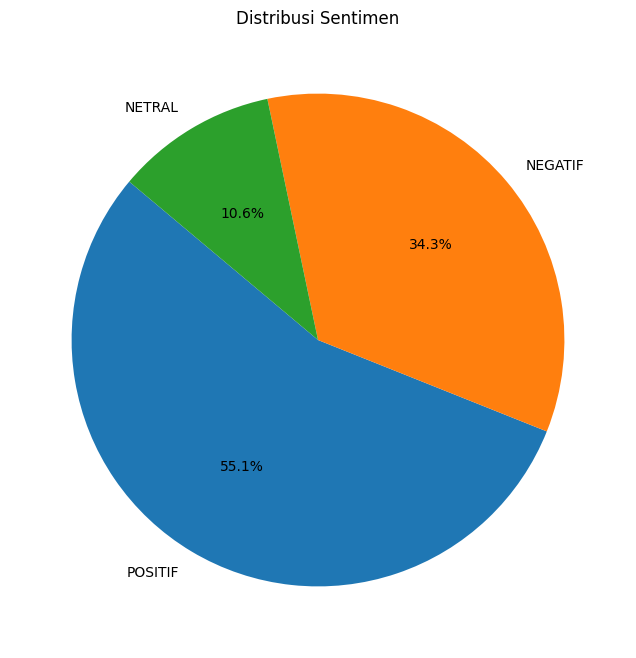

In [21]:
# Menghitung persentase
total_counts = sentiment_counts.sum()
percentages = (sentiment_counts / total_counts) * 100

# Membuat pie chart dengan data sebenarnya
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribusi Sentimen")
plt.show()

**WordCloud**

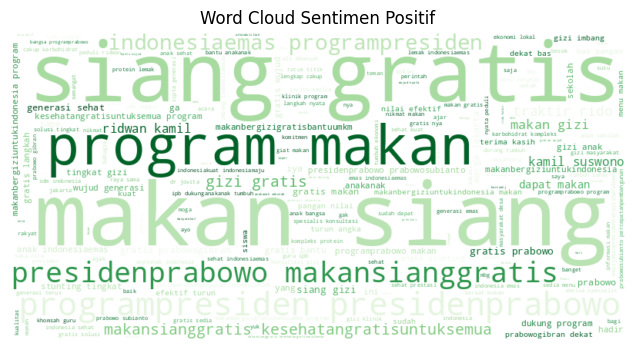

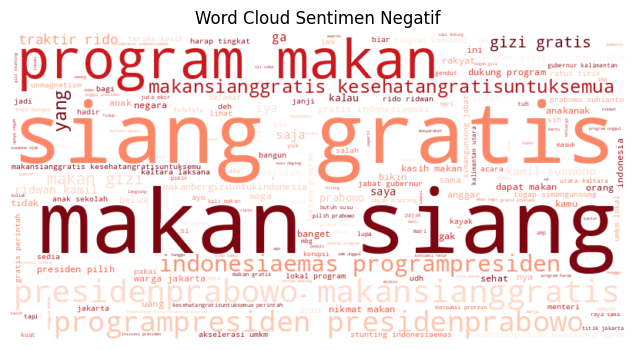

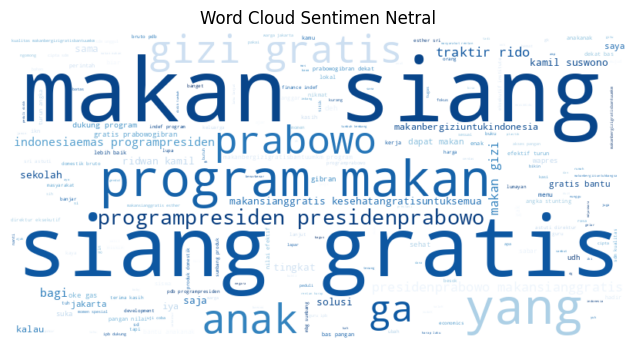

In [22]:
# Fungsi untuk membuat dan menampilkan WordCloud dengan warna tertentu
def create_wordcloud(text, title, color='black'):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=color).generate(text)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Memisahkan teks berdasarkan label sentimen
positif_text = ' '.join(data_label[data_label['label'] == 'POSITIF']['stemming'])
negatif_text = ' '.join(data_label[data_label['label'] == 'NEGATIF']['stemming'])
netral_text = ' '.join(data_label[data_label['label'] == 'NETRAL']['stemming'])

# Membuat WordCloud untuk tiap kategori sentimen dengan warna berbeda
create_wordcloud(positif_text, "Word Cloud Sentimen Positif", color='Greens')
create_wordcloud(negatif_text, "Word Cloud Sentimen Negatif", color='Reds')
create_wordcloud(netral_text, "Word Cloud Sentimen Netral", color='Blues')

**PEMODELAN SVM TANPA SMOTE**

In [24]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Skripsi/data_label.csv')
data

,stemming,label
0,makan siang gratis gratis beef teriyakinya pak...,POSITIF
1,dut makan siang gratis dut laper,POSITIF
2,kemensetnegri paham universitas hidup makan si...,NEGATIF
3,detikcom t t kapai operasional tri lembaga neg...,NEGATIF
4,unmagnetism makan siang gratis un,NEGATIF
...,...,...
2336,gizi imbang anak bangsa indonesiaemas programp...,POSITIF
2337,makan gizi indonesiaemas programpresiden presi...,POSITIF
2338,roseuro program makan siang gizi gratis komitm...,POSITIF
2339,ariekriting nyindir program makan siang gratis...,POSITIF


Proses TF-IDF

In [25]:
# Memastikan kolom 'stemming' dan 'label' ada
if 'stemming' in data.columns and 'label' in data.columns:
    # Inisialisasi TF-IDF Vectorizer
    vectorizer = TfidfVectorizer()

    # Terapkan TF-IDF pada kolom 'stemming'
    tfidf_matrix = vectorizer.fit_transform(data['stemming'])

    # Ubah hasil TF-IDF menjadi DataFrame agar lebih mudah dibaca
    data_tfidf = pd.DataFrame(
        tfidf_matrix.toarray(),  # Matriks TF-IDF
        columns=vectorizer.get_feature_names_out()  # Nama fitur (kata-kata)
    )

    # Tambahkan kolom 'label' untuk referensi
    data_tfidf['label'] = data['label'].values

    # Tampilkan DataFrame TF-IDF
    (data_tfidf)

Split Data

In [26]:
# Pisahkan fitur dan label
X = data_tfidf.drop(columns=['label'])  # Fitur TF-IDF
y = data_tfidf['label']  # Label

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Pemodelan dengan SVM

In [33]:
# Inisialisasi model SVM
model = SVC(kernel='linear')

# Latih model dengan data latih
model.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred = model.predict(X_test)

print(model)

SVC(kernel='linear')


Evaluasi Model

In [37]:
from sklearn.metrics import accuracy_score

# Lakukan prediksi pada data uji
y_pred = model.predict(X_test)

# 1. Hitung Akurasi
accuracy_without_smote = accuracy_score(y_test, y_pred)
print(f'Akurasi model tanpa smote: {accuracy_without_smote * 100:.2f}%')

Akurasi model tanpa smote: 71.41%


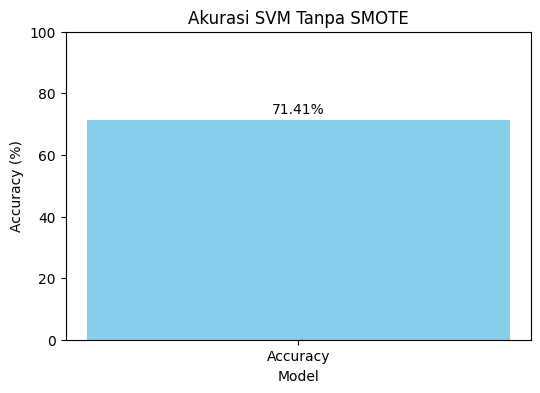

In [38]:
import matplotlib.pyplot as plt

# Akurasi model dari hasil evaluasi
accuracy = 71.41  # Akurasi model dalam persen

# Membuat grafik batang untuk akurasi
plt.figure(figsize=(6, 4))
plt.bar(['Accuracy'], [accuracy], color='skyblue')

# Menambahkan label pada grafik
plt.xlabel('Model')
plt.ylim(0, 100)  # Set batas y dari 0 ke 100 untuk menunjukkan skala penuh

# Menambahkan judul dan label
plt.title("Akurasi SVM Tanpa SMOTE")
plt.ylabel("Accuracy (%)")

# Menampilkan nilai akurasi di atas bar
plt.text(0, accuracy + 2, f"{accuracy:.2f}%", ha='center', color='black')

plt.show()


In [44]:
from sklearn.metrics import confusion_matrix

# Hitung Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Cetak Confusion Matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[151   3  87]
 [ 19   5  51]
 [ 38   3 346]]


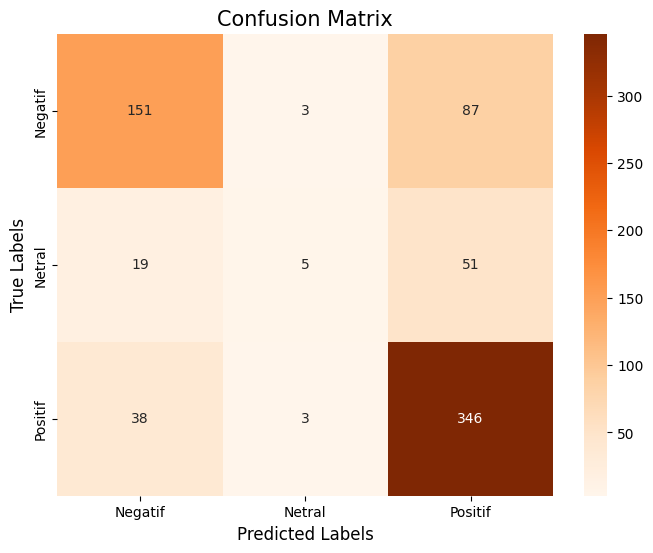

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Menggunakan Confusion Matrix dari hasil prediksi
cm = confusion_matrix(y_test, y_pred)

# Definisikan label kelas sesuai dataset Anda
labels = ['Negatif', 'Netral', 'Positif']  # Sesuaikan nama kelas sesuai kebutuhan

# Membuat heatmap untuk Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=labels, yticklabels=labels)

# Judul dan Label
plt.title(f'Confusion Matrix', fontsize=15)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)

# Menampilkan Grafik
plt.show()


In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming y_test contains the true labels for the test set
y_true = y_test

# Hitung Precision, Recall, F1-Score, dan Accuracy (Keseluruhan)
precision = precision_score(y_true, y_pred, average='weighted')  # Bisa 'macro', 'micro', atau 'weighted'
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
accuracy = accuracy_score(y_true, y_pred)

# Cetak hasil
print("Keseluruhan Metrics (Global):")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1-Score:  {f1:.2f}")

Keseluruhan Metrics (Global):
Precision: 0.69
Recall:    0.71
F1-Score:  0.68


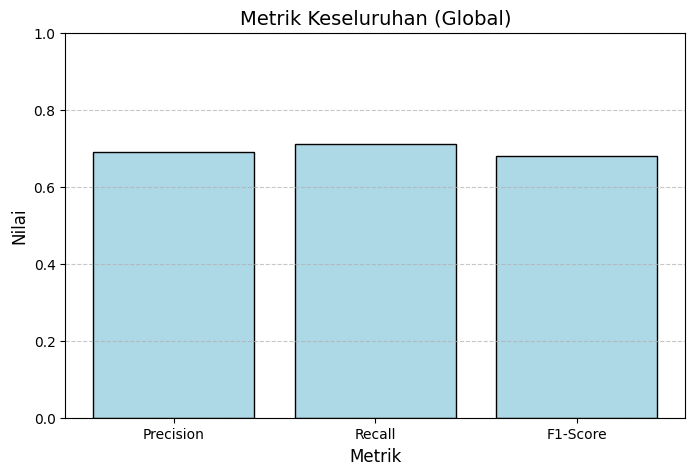

In [47]:
import matplotlib.pyplot as plt

# Data metrik berdasarkan input pengguna dari gambar
metrics = {
    "Precision": 0.69,
    "Recall": 0.71,
    "F1-Score": 0.68
}

# Mengambil nama dan nilai metrik untuk visualisasi
metric_names = list(metrics.keys())
metric_values = list(metrics.values())

# Membuat bar chart untuk metrik yang diberikan
plt.figure(figsize=(8, 5))
plt.bar(metric_names, metric_values, color='lightblue', edgecolor='black')
plt.ylim(0, 1)  # Mengatur rentang sumbu y antara 0 dan 1
plt.title("Metrik Keseluruhan (Global)", fontsize=14)
plt.xlabel("Metrik", fontsize=12)
plt.ylabel("Nilai", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan grafik
plt.show()


**PEMODELAN SVM DENGAN SMOTE**

TF-IDF DAN SMOTE

In [56]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

# Inisialisasi TF-IDF Vectorizer dan transformasikan data teks menjadi vektor numerik
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['stemming'])  # Hasil TF-IDF sebagai fitur
y = data['label']  # Label

# Terapkan SMOTE untuk menangani data tidak seimbang
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

print(smote)

SMOTE(random_state=42)


In [57]:
#Menampilkan value
y_smote.value_counts()

,count
label,
POSITIF,1289
NEGATIF,1289
NETRAL,1289


Pemodelan Dengan SVM

In [58]:
# Bagi data menjadi data latih dan data uji (70% latih, 30% uji)
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

# Inisialisasi model SVM dengan kernel linear
model = SVC(kernel='linear')

# Latih model dengan data latih
model.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred = model.predict(X_test)

Evaluasi Model

In [59]:
from sklearn.metrics import accuracy_score

# Hitung dan tampilkan akurasi
accuracy_with_smote = accuracy_score(y_test, y_pred)
print(f'\nAkurasi Model dengan SMOTE: {accuracy_with_smote * 100:.2f}%')



Akurasi Model dengan SMOTE: 83.89%


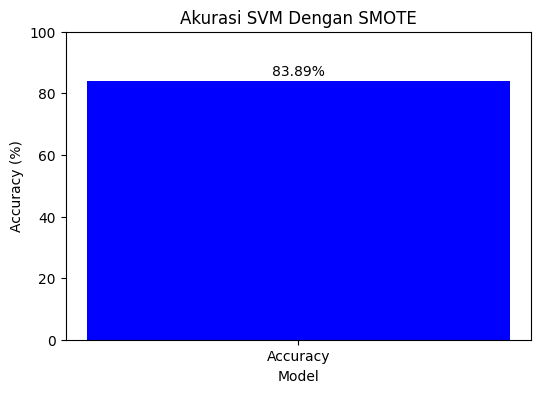

In [60]:
import matplotlib.pyplot as plt

# Akurasi model dari hasil evaluasi
accuracy = 83.89  # Akurasi model dalam persen

# Membuat grafik batang untuk akurasi
plt.figure(figsize=(6, 4))
plt.bar(['Accuracy'], [accuracy], color='blue')

# Menambahkan label pada grafik
plt.xlabel('Model')
plt.ylim(0, 100)  # Set batas y dari 0 ke 100 untuk menunjukkan skala penuh

# Menambahkan judul dan label
plt.title("Akurasi SVM Dengan SMOTE")
plt.ylabel("Accuracy (%)")

# Menampilkan nilai akurasi di atas bar
plt.text(0, accuracy + 2, f"{accuracy:.2f}%", ha='center', color='black')

plt.show()


In [61]:
from sklearn.metrics import confusion_matrix

# Hitung Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Cetak Confusion Matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[311  24  47]
 [ 11 360   5]
 [ 66  34 303]]


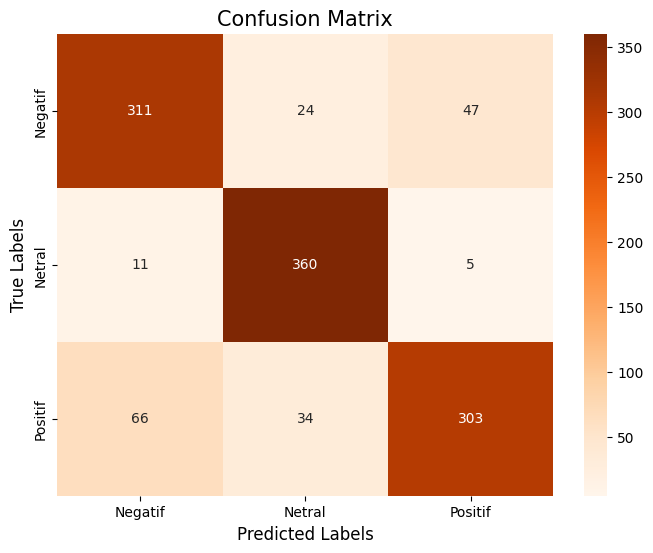

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Menggunakan Confusion Matrix dari hasil prediksi
cm = confusion_matrix(y_test, y_pred)

# Definisikan label kelas sesuai dataset Anda
labels = ['Negatif', 'Netral', 'Positif']  # Sesuaikan nama kelas sesuai kebutuhan

# Membuat heatmap untuk Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=labels, yticklabels=labels)

# Judul dan Label
plt.title(f'Confusion Matrix', fontsize=15)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)

# Menampilkan Grafik
plt.show()


In [63]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming y_test contains the true labels for the test set
y_true = y_test

# Hitung Precision, Recall, F1-Score, dan Accuracy (Keseluruhan)
precision = precision_score(y_true, y_pred, average='weighted')  # Bisa 'macro', 'micro', atau 'weighted'
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
accuracy = accuracy_score(y_true, y_pred)

# Cetak hasil
print("Keseluruhan Metrics (Global):")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1-Score:  {f1:.2f}")

Keseluruhan Metrics (Global):
Precision: 0.84
Recall:    0.84
F1-Score:  0.84


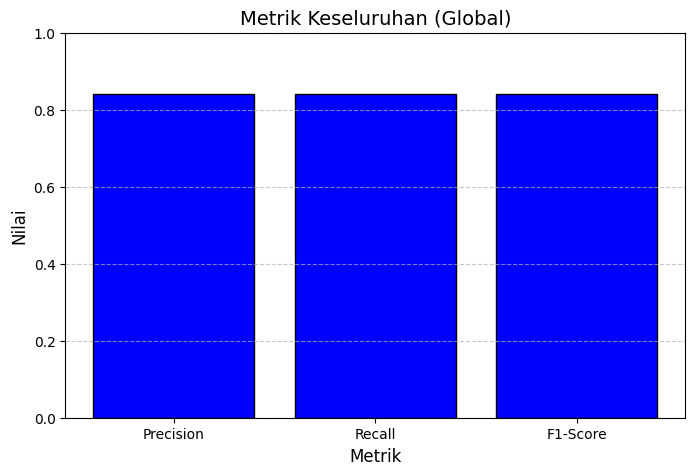

In [65]:
import matplotlib.pyplot as plt

# Data metrik berdasarkan input pengguna dari gambar
metrics = {
    "Precision": 0.84,
    "Recall": 0.84,
    "F1-Score": 0.84
}

# Mengambil nama dan nilai metrik untuk visualisasi
metric_names = list(metrics.keys())
metric_values = list(metrics.values())

# Membuat bar chart untuk metrik yang diberikan
plt.figure(figsize=(8, 5))
plt.bar(metric_names, metric_values, color='blue', edgecolor='black')
plt.ylim(0, 1)  # Mengatur rentang sumbu y antara 0 dan 1
plt.title("Metrik Keseluruhan (Global)", fontsize=14)
plt.xlabel("Metrik", fontsize=12)
plt.ylabel("Nilai", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan grafik
plt.show()


Hasil Perbandingan Akurasi

In [66]:
# Calculate and print accuracy improvement
accuracy_improvement = accuracy_with_smote - accuracy_without_smote
print(f'\nPeningkatan Akurasi Setelah SMOTE: {accuracy_improvement * 100:.2f}%')


Peningkatan Akurasi Setelah SMOTE: 12.48%


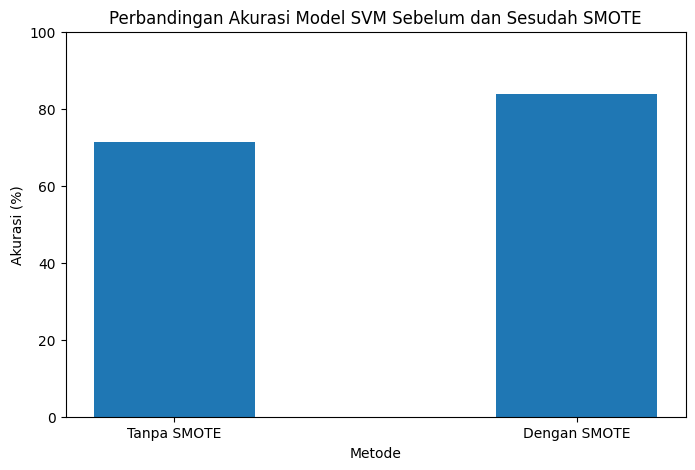

In [67]:
import matplotlib.pyplot as plt

# Data for accuracy values
accuracy_values = [accuracy_without_smote * 100, accuracy_with_smote * 100]
labels = ["Tanpa SMOTE", "Dengan SMOTE"]

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, accuracy_values, width=0.4)
plt.xlabel("Metode")
plt.ylabel("Akurasi (%)")
plt.title("Perbandingan Akurasi Model SVM Sebelum dan Sesudah SMOTE")
plt.ylim(0, 100)
plt.show()
